<a href="https://colab.research.google.com/github/FunmiSomoye/A-B-Testing/blob/main/Statistical_Analysis_AB_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

###Import Data and Dependencies

#####Import Libraries and set Dependencies

In [ ]:
#set dependencies
#filter out warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
#basics
import pandas as pd
import numpy as np

#statistics
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#####Import Data

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import data
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Turing College/Final Project Results.xlsx', sheet_name = ['Control','Experiment'])
control_data = data['Control']
experiment_data = data['Experiment']

###Data Insights

#####Experiment

In [ ]:
experiment.head(3)

,Date,Pageviews,Clicks,Enrollments,Payments,Tag,CTR
0,"Sat, Oct 11",7716,686,105.0,34.0,experiment,0.088906
1,"Sun, Oct 12",9288,785,116.0,91.0,experiment,0.084518
2,"Mon, Oct 13",10480,884,145.0,79.0,experiment,0.084351


In [ ]:
experiment.shape

(37, 7)

There are 37 rows and 5 columns

In [ ]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
 5   Tag          37 non-null     object 
 6   CTR          37 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ KB


There are clearly missing values in this data. <br/>
Also, the datatypes for columns 3 and 4 would more appropriately be integers.

#####Control

In [ ]:
control.head(3)

,Date,Pageviews,Clicks,Enrollments,Payments,Tag,CTR
37,"Sat, Oct 11",7723,687,134.0,70.0,control,0.088955
38,"Sun, Oct 12",9102,779,147.0,70.0,control,0.085586
39,"Mon, Oct 13",10511,909,167.0,95.0,control,0.086481


In [ ]:
control.shape

(37, 7)

Control data is equal in dimension to Experiment data

In [ ]:
control.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 37 to 73
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         37 non-null     object 
 1   Pageviews    37 non-null     int64  
 2   Clicks       37 non-null     int64  
 3   Enrollments  23 non-null     float64
 4   Payments     23 non-null     float64
 5   Tag          37 non-null     object 
 6   CTR          37 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.3+ KB


The Control data is similar in characteristics to the Experiment data.

#####Combining the two Dataframes

In [ ]:
experiment.describe()

,Pageviews,Clicks,Enrollments,Payments,CTR
count,37.000000,37.000000,23.000000,23.000000,37.000000
mean,9315.135135,765.540541,148.826087,84.565217,0.082191
std,708.070781,64.578374,33.234227,23.060841,0.003116
min,7664.000000,642.000000,94.000000,34.000000,0.074133
25%,8881.000000,722.000000,127.000000,69.000000,0.079855
50%,9359.000000,770.000000,142.000000,91.000000,0.082722
75%,9737.000000,827.000000,172.000000,99.000000,0.084351
max,10551.000000,884.000000,213.000000,123.000000,0.088906


In [ ]:
control.describe()

,Pageviews,Clicks,Enrollments,Payments,CTR
count,37.000000,37.000000,23.000000,23.000000,37.000000
mean,9339.000000,766.972973,164.565217,88.391304,0.082129
std,740.239563,68.286767,29.977000,20.650202,0.003229
min,7434.000000,632.000000,110.000000,56.000000,0.071338
25%,8896.000000,708.000000,146.500000,70.000000,0.079601
50%,9420.000000,759.000000,162.000000,91.000000,0.082909
75%,9871.000000,825.000000,175.000000,102.500000,0.084117
max,10667.000000,909.000000,233.000000,128.000000,0.088955


The data distributions are different on face value.

In [ ]:
#create new columns to tag both datasets
experiment_data['Tag'] = 'experiment'
control_data['Tag'] = 'control'

In [ ]:
#combine the two frames
df = experiment_data.append(control_data, ignore_index=True)

###Feature Handling

#####Missing Values

In [ ]:
#inspect the missing values
df[df.isnull().any(axis=1)]

,Date,Pageviews,Clicks,Enrollments,Payments,Tag
23,"Mon, Nov 3",9359,789,NaN,NaN,experiment
24,"Tue, Nov 4",9427,743,NaN,NaN,experiment
25,"Wed, Nov 5",9633,808,NaN,NaN,experiment
26,"Thu, Nov 6",9842,831,NaN,NaN,experiment
27,"Fri, Nov 7",9272,767,NaN,NaN,experiment
28,"Sat, Nov 8",8969,760,NaN,NaN,experiment
29,"Sun, Nov 9",9697,850,NaN,NaN,experiment
30,"Mon, Nov 10",10445,851,NaN,NaN,experiment
31,"Tue, Nov 11",9931,831,NaN,NaN,experiment
32,"Wed, Nov 12",10042,802,NaN,NaN,experiment


From the overview of the data, I posit that the missing data are not missing at random; first missing date on both Experiment and Control is Nov 3, and last missing date Nov 16. 

In [ ]:
#create a new data frame dropping all rows with at least 1 missing values
df_2 = df.dropna(how='any')
df_2.shape

(46, 6)

#####Datatype Conversion

Integer is a more appropriate datatype for Enrollments and Payments columns

In [ ]:
#convert the data columns 3 and 4 from floats to integer
cols = ['Enrollments', 'Payments']
df_2[cols] = df_2[cols].applymap(np.int64)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 59
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         46 non-null     object
 1   Pageviews    46 non-null     int64 
 2   Clicks       46 non-null     int64 
 3   Enrollments  46 non-null     int64 
 4   Payments     46 non-null     int64 
 5   Tag          46 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


###Exploratory Data Analysis on Full Sample

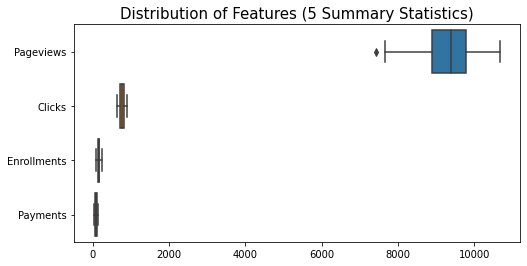

In [ ]:
#compare the data distribution between columns
fig = plt.figure(figsize=(8, 4))
plt.title('Distribution of Features (5 Summary Statistics)', size=15)
sns.boxplot(orient='h', data=df)

Generally, the number of views clearly outnumber the number of Clicks and conversions. There is an outlier at the lower end of the pageviews distribution.

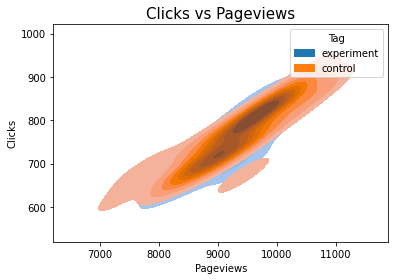

In [ ]:
plt.title('Clicks vs Pageviews', size=15)
sns.kdeplot(data=df, x='Pageviews', y='Clicks', hue='Tag', fill=True)

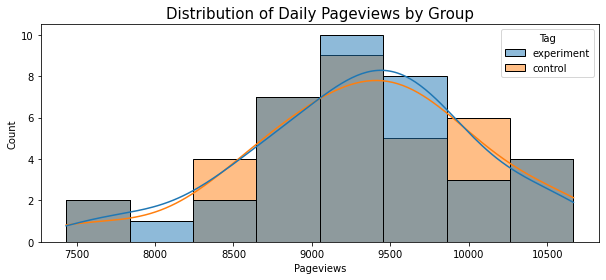

In [ ]:
#plot the data distribution for Pageviews
fig = plt.figure(figsize=(10, 4))
plt.title('Distribution of Daily Pageviews by Group', size=15)
sns.histplot(data=df, x='Pageviews', hue='Tag', kde=True)

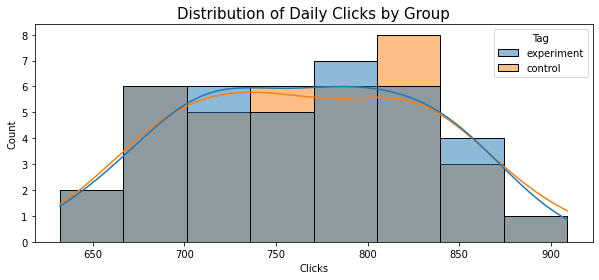

In [ ]:
#plot the data distribution for Pageviews
fig = plt.figure(figsize=(10, 4))
plt.title('Distribution of Daily Clicks by Group', size=15)
sns.histplot(data=df, x='Clicks', hue='Tag', kde=True)

The distribution for both groups are very similar.<br/>
The number of pageviews ranges from around 7500 to 10500, 9000 to 9500 views occurring more often than below or above that range. The distribution of the pageviews is slightly skewed to the left because of the outliers as observed in the boxplot above.<br/>
On most days, the number of clicks ranged from around 670 to around 830, with a special day having as many as 900 views.

###Statistical Data Analysis

Null Hypothesis: The click-through rate of the Control group is similar to  the click-through rate Experiment group.<br/>
Alternative Hypothesis: The click-through rates between the Control and Experiment groups are not the same. <br/>
Confidence Level = 95%

Solve for zscore

In [ ]:
#define function to compute area under curve for the left side of distribution
def auc(confidence_pct):
  confidence_level = confidence_pct/100
  alpha_level = (1-confidence_level)/2
  auc_left = (1 + confidence_level)/2 #auc is area under curve
  return alpha_level, auc_left

In [ ]:
#95% confidence level
alpha_95, auc_95 = auc(95)
print(alpha_95, auc_95)

0.025000000000000022 0.975


zscore is approximately 1.96 from the z table

In [ ]:
#save zscore in a variable
zscore_95 = 1.96

Compute and save parameters

In [ ]:
#create a column with click-through rates
df['CTR'] = df['Clicks'] / df['Pageviews']

In [ ]:
control = df[df['Tag']=='control']
experiment = df[df['Tag']=='experiment']

#control
control_size = control['Pageviews'].sum()
control_click_count = control['Clicks'].sum()

#experiment
experiment_size = experiment['Pageviews'].sum()
experiment_click_count = experiment['Clicks'].sum()

#####1. Visualize 95% confidence interval between control and experiment groups on [click-through rate]. Explain what the confidence interval means, what's the relationship with the population of a group.

In [ ]:
#compute and save parameters

"""
click-through rate
assuming that pageviews is unique to a user:
click-through rate = number of clicks / number of pageviews
"""

#control
control_click_through = control_click_count/control_size #control proportion

#experiment
experiment_click_through = experiment_click_count/experiment_size #experiment proportion

print('Control click-through rate: ', control_click_through, '\n', 'Experiment click-through rate: ', experiment_click_through)

Control click-through rate:  0.08212581357457682 
 Experiment click-through rate:  0.08218244066616376


In [ ]:
#compute standard errors
se = np.sqrt(((control_click_through * (1-control_click_through))/control_size) + ((experiment_click_through * (1-experiment_click_through))/experiment_size))

#compute proportion difference
difference = control_click_through - experiment_click_through

#confidence interval
conf_interval = [(difference - (zscore_95*se)), (difference + (zscore_95*se))]

print("The point estimate of the difference is", difference)
print(f"The Confidence Interval is between {conf_interval[0]} and {conf_interval[1]}")

The point estimate of the difference is -5.662709158693602e-05
The Confidence Interval is between -0.0013523068034943038 and 0.0012390526203204318


*Interpretation*<br/>
I am 95% confident that the difference in the overall click-through rate between the Control group and the Experiment group is between approximately -0.0014 and 0.0012 in a one-month experiment period, with Experiment group having the higher values.<br/>
The best estimate of the difference, the point estimate, is 5.66e-05 <br/>
Since 0% is in the interval, there is not a significant difference between the Experiment and Control groups.

#####Visualise the Confidence Interval on Click-through Rate between Control and Experiment.

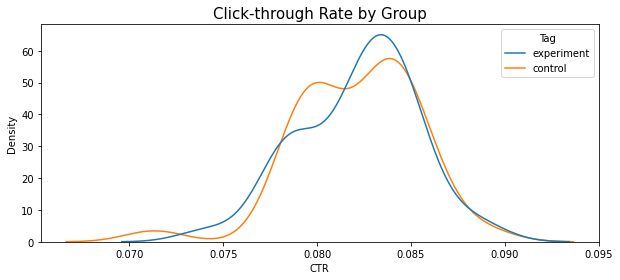

In [ ]:
fig = plt.figure(figsize=(10, 4))
plt.title('Click-through Rate by Group', size=15)
sns.kdeplot(data=df, x='CTR', hue='Tag')

####**Additional Metrics Definition**

In considering Enrollments and Payments, we are limited up to the 3rd of November because the data from that date onwards are still yet to be logged in. Use the dataset without Nans.

**Overall Conversion Rate**

To compare the overall effect of each design in translating to paying customers.
Payments/Pageviews

**Click Conversion Rate**

To compare the effectiveness of interaction the UI and UX of information to visitors to enrol. Enrollments/Clicks

**Enrollment Conversion Rate**

To compare the effectiveness of contents in converting enrollees to paying students. Payments/Enrollment

In [ ]:
#compute and save parameters

#OCR = Overall Conversion Rate
df_2['OCR'] = df_2['Payments']/df_2['Pageviews']
#CCR = Click Conversion Rate
df_2['CCR'] = df_2['Enrollments']/df_2['Clicks']
#ECR = Enrollment Conversion Rate
df_2['ECR'] = df_2['Payments']/df_2['Enrollments']

#split groups
control_2 = df_2[df_2['Tag']=='control']
experiment_2 = df_2[df_2['Tag']=='experiment']

#control
control_size_trunc = control_2['Pageviews'].sum()
control_click_count_trunc = control_2['Clicks'].sum()
control_payment_count = control_2['Payments'].sum()
control_enrol_count = control_2['Enrollments'].sum()

#experiment
experiment_size_trunc = experiment_2['Pageviews'].sum()
experiment_click_count_trunc = experiment_2['Clicks'].sum()
experiment_payment_count = experiment_2['Payments'].sum()
experiment_enrol_count = experiment_2['Enrollments'].sum()

#####2. Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.

**Click-through Rate (Overall)**

In [ ]:
count = [control_click_count, experiment_click_count]
nobs = [control_size, experiment_size]
ctr_zstatistics, ctr_pvalue = proportions_ztest(count, nobs, alternative='two-sided', prop_var=False)
print('ztstats:',ctr_zstatistics, '\npvalue:',ctr_pvalue)

ztstats: -0.08566094109242048 
pvalue: 0.9317359524473912


*Interpretation*<br/>
p-value is 0.93, which is greater than the alpha value of 0.025, with a zvalue of |0.085|.<br/>
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Through Rates of the control and the experiment groups.

**Overall Conversion Rate**

In [ ]:
count = [control_payment_count, experiment_payment_count]
nobs = [control_size_trunc, experiment_size_trunc]
ocr_zstatistics, ocr_pvalue = proportions_ztest(count, nobs, alternative='two-sided', prop_var=False)
print('ztstats:',ocr_zstatistics, '\npvalue:',ocr_pvalue)

ztstats: 1.281996502441112 
pvalue: 0.19984387315558716


*Interpretation*<br/>
p-value is 0.199, which is greater than the alpha value of 0.025, with a zvalue of 1.28 and a z-score of 0.899.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Overall Conversion Rates of the control and the experiment groups.

**Click Conversion Rate**

In [ ]:
count = [control_enrol_count, experiment_enrol_count]
nobs = [control_click_count_trunc, experiment_click_count_trunc]
ccr_zstatistics, ccr_pvalue = proportions_ztest(count, nobs, alternative='two-sided', prop_var=False)
print('ztstats:',ccr_zstatistics, '\npvalue:',ccr_pvalue)

ztstats: 4.701830023753982 
pvalue: 2.578401033720593e-06


*Interpretation*<br/>
p-value is approximately 0.000026, which is less than the alpha value of 0.025, with a zvalue of 4.70 and a z-score greater than 1.<br/> 
We thus reject the null hypothesis that there is no difference between the two groups.<br/>
This provides a strong evidence that there is a significant difference between the click conversion rates of the control and experiment groups.

**Enrollment Conversion Rate**

In [ ]:
count = [control_payment_count, experiment_payment_count]
nobs = [control_enrol_count, experiment_enrol_count]
ecr_zstatistics, ecr_pvalue = proportions_ztest(count, nobs, alternative='two-sided', prop_var=False)
print('ztstats:',ecr_zstatistics, '\npvalue:',ecr_pvalue)

ztstats: -2.65092819003226 
pvalue: 0.008027090611358445


*Interpretation*<br/>
p-value is 0.008, which is less than the alpha value of 0.025, with a zvalue of 2.65 and a z-score of 0.995.<br/> 
We thus reject the null hypothesis that there is no difference between the two groups.<br/>
This provides a strong evidence that there is a significant difference between the enrollment conversion rates control and experiment groups.

In [ ]:
control_2.shape

(23, 9)

Ztest is not ideal all the metrics excluding the Click-through rate. Ttest is bound to give different results.

#####3. Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level.

**Click-through Rate (Overall)**

In [ ]:
control_ctr_arr = control['CTR'].values #control
experiment_ctr_arr = experiment['CTR'].values #experiment

ttest_ind(a=control_ctr_arr, b=experiment_ctr_arr)

Ttest_indResult(statistic=-0.08302608446561602, pvalue=0.9340611962072063)

The ttest for Click-through Rate has the same conclusion as with the ztest.

**Overall Conversion Rate**

In [ ]:
control_ocr_arr = control_2['OCR'].values #control
experiment_ocr_arr = experiment_2['OCR'].values #experiment

ttest_ind(a=control_ocr_arr, b=experiment_ocr_arr)

Ttest_indResult(statistic=0.5581848603463653, pvalue=0.5795475746555272)

*Interpretation*<br/>
According to this ttest, p-value is 0.57, which is greater than the alpha value of 0.025, with a tstatistic of 0.558.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Overall Conversion Rates of the control and the experiment groups.

Which is the same conclusion as with the ztest.

**Click Conversion Rate**

In [ ]:
control_ccr_arr = control_2['CCR'].values #control
experiment_ccr_arr = experiment_2['CCR'].values #experiment

ttest_ind(a=control_ccr_arr, b=experiment_ccr_arr)

Ttest_indResult(statistic=1.5396752696188791, pvalue=0.13080105104323278)

*Interpretation*<br/>
According to this ttest, p-value is 0.13, which is greater than the alpha value of 0.025, with a tstatistic of 1.53.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

This is different from the conclusion of the ztest where the Null Hypothesis was rejected.

**Enrollment Conversion Rate**

In [ ]:
control_ecr_arr = control_2['ECR'].values #control
experiment_ecr_arr = experiment_2['ECR'].values #experiment

ttest_ind(a=control_ecr_arr, b=experiment_ecr_arr)

Ttest_indResult(statistic=-1.0081408912731535, pvalue=0.3188989662061842)

*Interpretation*<br/>
According to this ttest, p-value is 0.31, which is greater than the alpha value of 0.025, with a tstatistic of -1.01.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

This is different from the conclusion of the ztest where the Null Hypothesis was rejected.

#####4. Compare both test method results. Explain why they differ / do not differ that much and why.

The pvalues of the ztest and ttest results for the Click-through rates are very largely the same. This might be due to the fact that the data sizes are significantly larger than 30.

The pvalues of the ztests and ttests for the other metrics differed greatly, although the Overall Conversion Rate had the same conclusion as in the ztest. This is most likely due to the fact that the dataset was truncated because of meeting data for dates beyond the 2nd of November in both groups, significan tly reducing the data sizes.

#####5. Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.


**Click-through Rate (Overall)**

In [ ]:
print('ztstats:',ctr_zstatistics, '\npvalue:',ctr_pvalue)

ztstats: -0.08566094109242048 
pvalue: 0.9317359524473912


#####*60% Confidence Level*

In [ ]:
#60% confidence level
alpha_60, auc_60 = auc(60)
print('alpha:',alpha_60, '\nauc:',auc_60)

alpha: 0.2 
auc: 0.8


zscore is approximately 0.85 from the z table

*Interpretation*<br/>
p-value is 0.93, which is greater than the alpha value of 0.2, with a zstatistic of |0.085|.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

#####*90% Confidence Level*

In [ ]:
#90% confidence level
alpha_90, auc_90 = auc(90)
print('alpha:',alpha_90, '\nauc:',auc_90)

alpha: 0.04999999999999999 
auc: 0.95


zscore is approximately 1.65 from the z table

*Interpretation*<br/>
p-value is 0.93, which is greater than the alpha value of 0.049, with a zstatistic of |0.085|.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

#####*95% Confidence Level*

In [ ]:
#call previously computed zscore
print('alpha:',alpha_95, '\nauc:',auc_95)
print('zscore:',zscore_95)

alpha: 0.025000000000000022 
auc: 0.975
zscore: 1.96


*Interpretation*<br/>
p-value is 0.93, which is greater than the alpha value of 0.025, with a zstatistic of |0.085|.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

#####*99% Confidence Level*

In [ ]:
#99% confidence level
alpha_99, auc_99 = auc(99)
print('alpha:',alpha_99, '\nauc:',auc_99)

alpha: 0.0050000000000000044 
auc: 0.995


zscore is approximately 2.58 from the z table

*Interpretation*<br/>
p-value is 0.93, which is greater than the alpha value of 0.005, with a zstatistic of |0.085|.<br/> 
We thus fail to reject the null hypothesis that there is no difference between the two groups.<br/>
There is not sufficient evidence to conclude that there is a difference between the Click Conversion Rates of the control and the experiment groups.

The conclusions for the conducted ztetsts are the same across all confidence levels for the click-through rate.

###Summary

*   Other metrics evaluated apart from the Click-through Rate includes *Overall Conversion Rate*, *Click Conversion Rate*, and *Enrollment Conversion Rate*
*   The p-values of the ztest and ttest results for the Click-through rates are very largely the same. However, the pvalues of the ztests and ttests for the other metrics differed greatly, although the Overall Conversion Rate had the same conclusion as in the ztest.
*   The conclusions for the conducted ztests are the same across all confidence levels for the click-through rate.
*   There is not a significant difference between the Experiment and Control groups, also as confirmed from the Confidence Intervals